In [ ]:
!python main.py -d person -p 'smokes(person);friends(person,person)' \
    -f 'smokes(x) ^ friends(x,y) => smokes(y);smokes(x)' -s 5

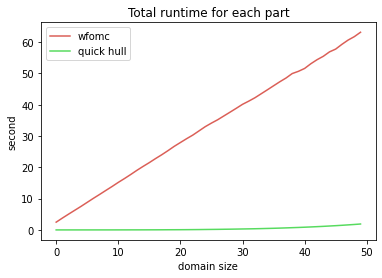

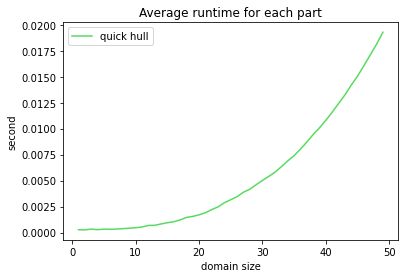

In [13]:
import re
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

max_domain_size = 50


def parse_wfomc_time(log_str):
    res = re.findall(r'elapsed time for WFOMC call: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_quick_hull_time(log_str):
    res = re.findall(r'elapsed time for quick-hull: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_add_facet_time(log_str):
    res = re.findall(r'function add_facet execution time: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_time(log_file):
    with open(log_file, 'r') as f:
        log = f.read()
    wfomc_time, quick_hull_time, add_facet_time = \
        parse_wfomc_time(log), parse_quick_hull_time(log), parse_add_facet_time(log)
    return wfomc_time, quick_hull_time, add_facet_time
    

total_wfomc_time = []
average_wfomc_time = []
total_quick_hull_time = []
average_quick_hull_time = []
total_add_facet_time = []
average_add_facet_time = []
for i in range(1, max_domain_size + 1):
    wfomc_time, quick_hull_time, add_facet_time = parse_time('./logs/log{}.txt'.format(i))
    total_wfomc_time.append(np.sum(wfomc_time))
    average_wfomc_time.append(np.mean(wfomc_time))
    total_quick_hull_time.append(np.sum(quick_hull_time))
    average_quick_hull_time.append(np.mean(quick_hull_time))
    total_add_facet_time.append(np.sum(add_facet_time))
    average_add_facet_time.append(np.mean(add_facet_time))
    

plt.title('Total runtime for each part')
colors = sns.color_palette('hls', 3)
plt.plot(total_wfomc_time, label='wfomc', color=colors[0])
plt.plot(total_quick_hull_time, label='quick hull', color=colors[1])
# plt.plot(total_add_facet_time, label='add facet', color=colors[2])
plt.legend()
plt.xlabel('domain size')
plt.ylabel('second')
plt.show()


plt.title('Average runtime for each part')
colors = sns.color_palette('hls', 3)
plt.plot(average_wfomc_time, label='wfomc', color=colors[0])
plt.plot(average_quick_hull_time, label='quick hull', color=colors[1])
# plt.plot(average_add_facet_time, label='add facet', color=colors[2])
plt.legend()
plt.xlabel('domain size')
plt.ylabel('second')
plt.show()

![](./polytope.png)